<a href="https://colab.research.google.com/github/matjesg/deepflash2/blob/master/paper/2_train_and_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# deepflash2 - Train and Predict

> This notebook reproduces the results of the deepflash2 [paper](https://arxiv.org/abs/2111.06693) for semantic and instance segmentation.

- **Data and models**: Data and trained models are available on [Google Drive](https://drive.google.com/drive/folders/1r9AqP9qW9JThbMIvT0jhoA5mPxWEeIjs?usp=sharing). To use the data in Google Colab, create a [shortcut](https://support.google.com/drive/answer/9700156?hl=en&co=GENIE.Platform%3DDesktop) of the data folder in your personal Google Drive.

*References*:

Griebel, M., Segebarth, D., Stein, N., Schukraft, N., Tovote, P., Blum, R., & Flath, C. M. (2021). Deep-learning in the bioimaging wild: Handling ambiguous data with deepflash2. arXiv preprint arXiv:2111.06693.


## Setup

- Install dependecies
- Connect to drive

In [ ]:
!pip install deepflash2

In [2]:
# Imports
from deepflash2.all import *
from pathlib import Path

In [4]:
# Connect to drive
try:
  from google.colab import drive
  drive.mount('/gdrive')
except:
  print('Google Drive is not available.')

Mounted at /gdrive


## Settings

Choose dataset from `PV_in_HC`,  `cFOS_in_HC`, `mScarlet_in_PAG`,  `YFP_in_CTX`, `GFAP_in_HC`

In [ ]:
DATASET = 'cFOS_in_HC'
SEED = 0 # We used seeds [0,1,2] in our experiemnts
OUTPUT_PATH = Path("/content/predictions") # Save predictions here
MODEL_PATH = Path("/content/models") # Save models here
DATA_PATH = Path('/gdrive/MyDrive/deepflash2-paper/data')
TRAINED_MODEL_PATH= Path('/gdrive/MyDrive/deepflash2-paper/models/')

# deepflash2 config class
cfg = Config(random_state=SEED)

## Data preprocessing

- Initialize `EnsembleLearner`
- Plot images and masks to show if they are correctly loaded

Found 0 models in folder /content/models/cFOS_in_HC
[]
Found 36 images in "images" and 36 masks in "masks_STAPLE".
Computing Stats...


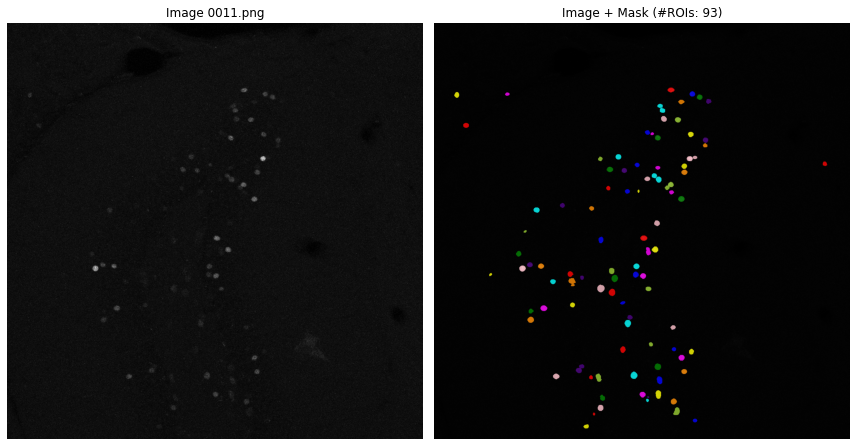

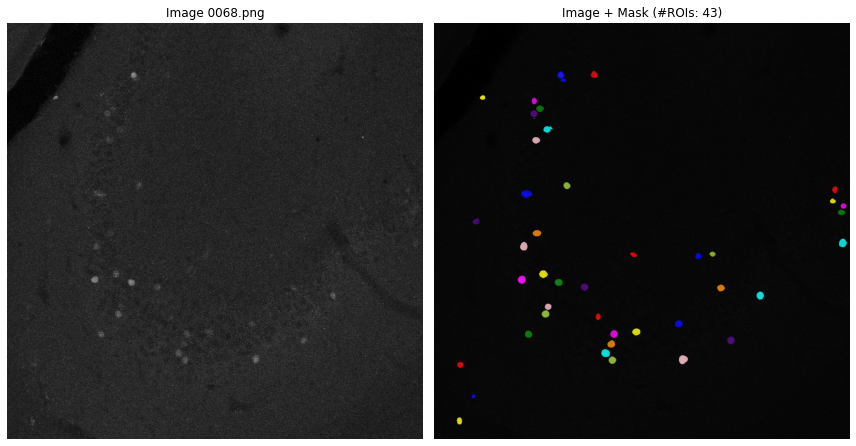

In [ ]:
train_data_path = DATA_PATH/DATASET/'train'
ensemble_path = MODEL_PATH/DATASET

el = EnsembleLearner(image_dir='images', 
                     mask_dir='masks_STAPLE', 
                     config=cfg, 
                     path=train_data_path, 
                     ensemble_path=ensemble_path)

el.ds.show_data(max_n=2, overlay=True)

## Train models

- Train model ensemble with 5 models
  - 2500 iterations for each model
- You can skip this step use the trained models from our paper (see next section).

In [ ]:
n_iter = 2500
el.fit_ensemble(n_iter)

## Prediction on test set

We save
- Semantic segmentation masks (.png)
- Instance segmentation masks (.tif) using the cellpose flow representations
- Foreground uncertainty scores *U*

To ensure reproducibilty we will use the trained models from our paper!

Found 5 models in folder /gdrive/MyDrive/deepflash2-paper/models/cFOS_in_HC/1
['Unet_resnet34_2classes-fold1.pth', 'Unet_resnet34_2classes-fold2.pth', 'Unet_resnet34_2classes-fold3.pth', 'Unet_resnet34_2classes-fold4.pth', 'Unet_resnet34_2classes-fold5.pth']
Computing Stats...


Predicting 1444.tif


Predicting 1385.tif


Predicting 1418.tif


Predicting 1582.tif


Predicting 1377.tif


Predicting 1283.tif


Predicting 1599.tif


Predicting 1237.tif


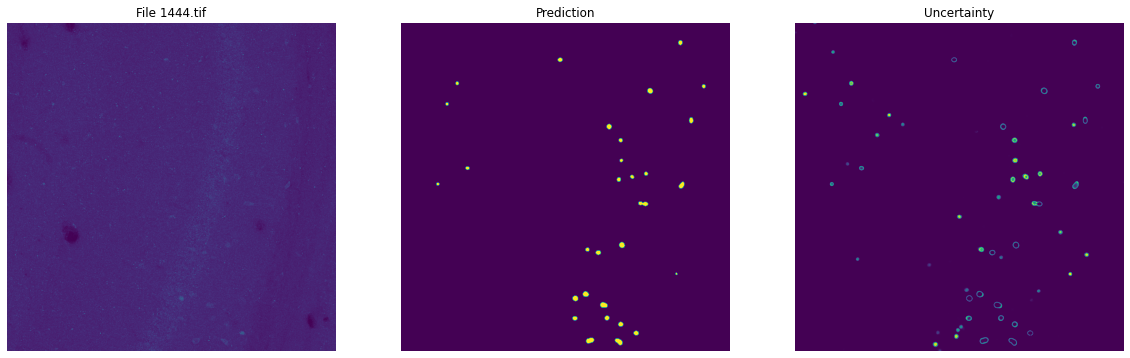

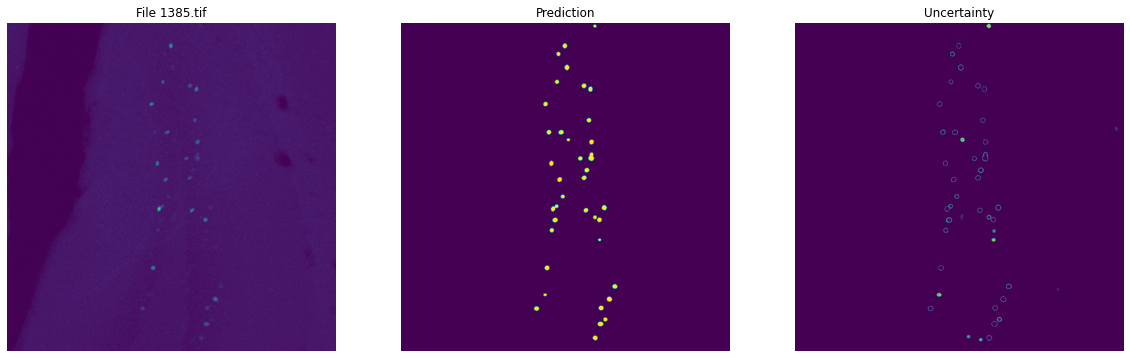

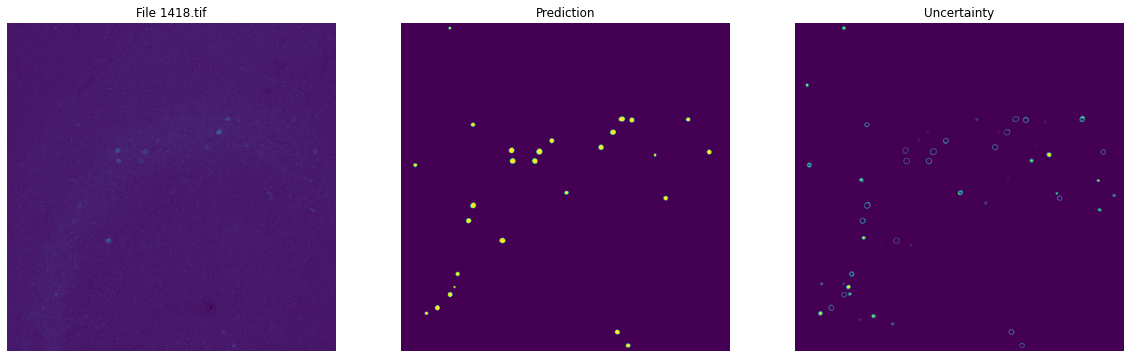

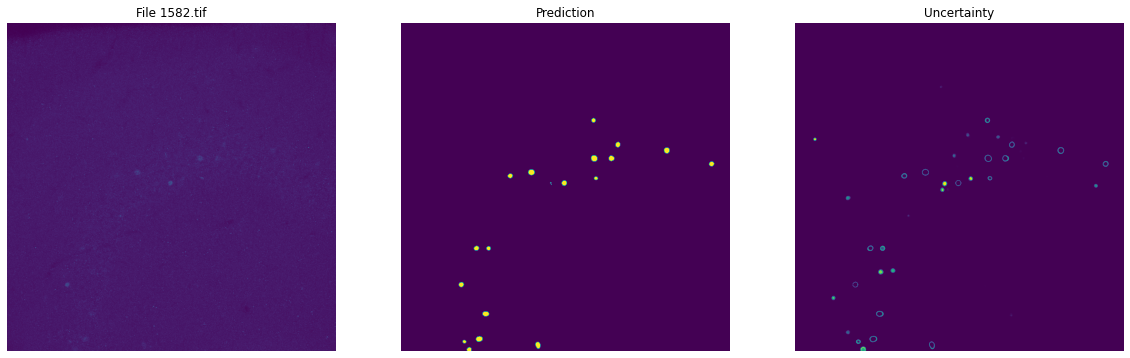

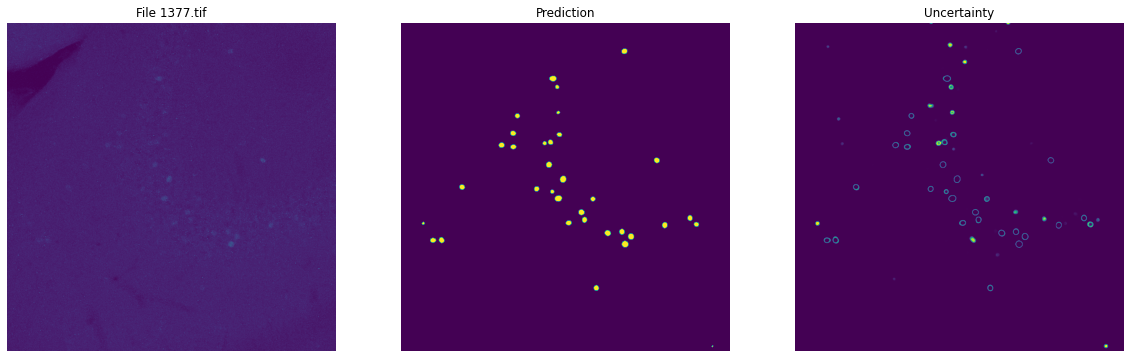

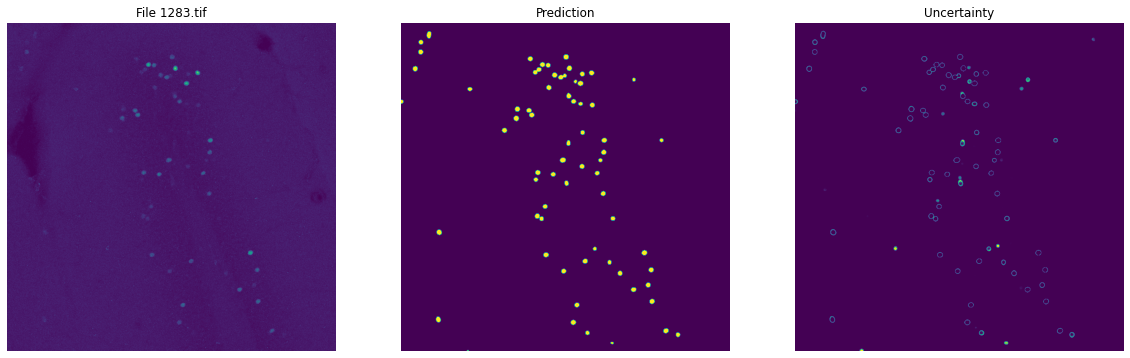

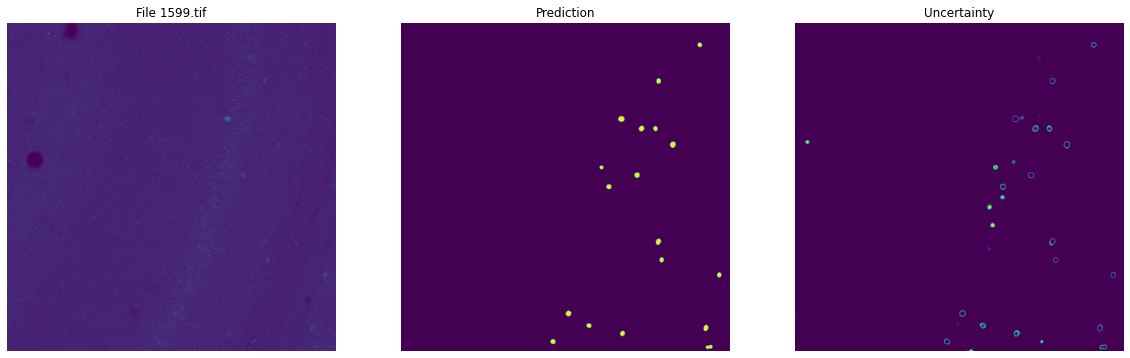

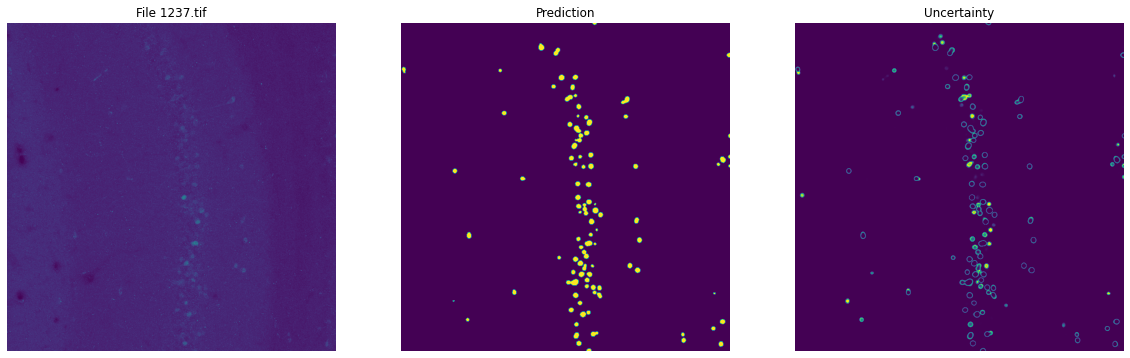

In [ ]:
test_data_path = DATA_PATH/DATASET/'test'
ensemble_trained_path = TRAINED_MODEL_PATH/DATASET/f'{SEED+1}'
prediction_path = OUTPUT_PATH/DATASET

el_pred = EnsembleLearner('images',
                          path=test_data_path, 
                          config=cfg, 
                          ensemble_path=ensemble_trained_path) 

# Predict and save semantic segmentation masks
el_pred.get_ensemble_results(el_pred.files, 
                             use_tta=True, 
                             export_dir=prediction_path/'masks')
# Save uncertainty scores
df_unc = el_pred.df_ens[['file', 'ensemble', 'n_models', 'uncertainty_score']]
df_unc.to_csv(prediction_path/'uncertainty_scores.csv', index=False)

# Show results scores
el_pred.show_ensemble_results()

Installing cellpose. Please wait.


creating new log file
Using diameter of 15


100%|██████████| 25.3M/25.3M [00:00<00:00, 55.8MB/s]
100%|██████████| 25.3M/25.3M [00:00<00:00, 56.1MB/s]
100%|██████████| 25.3M/25.3M [00:00<00:00, 56.6MB/s]
100%|██████████| 25.3M/25.3M [00:00<00:00, 57.3MB/s]
100%|██████████| 3.54k/3.54k [00:00<00:00, 5.22MB/s]


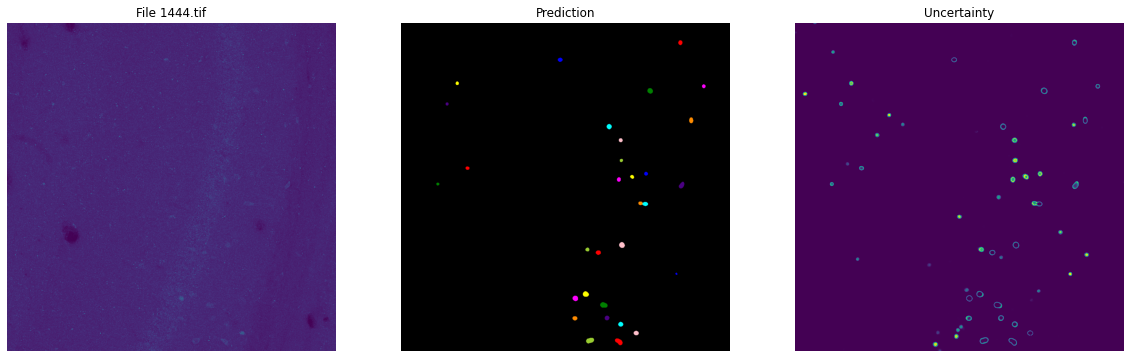

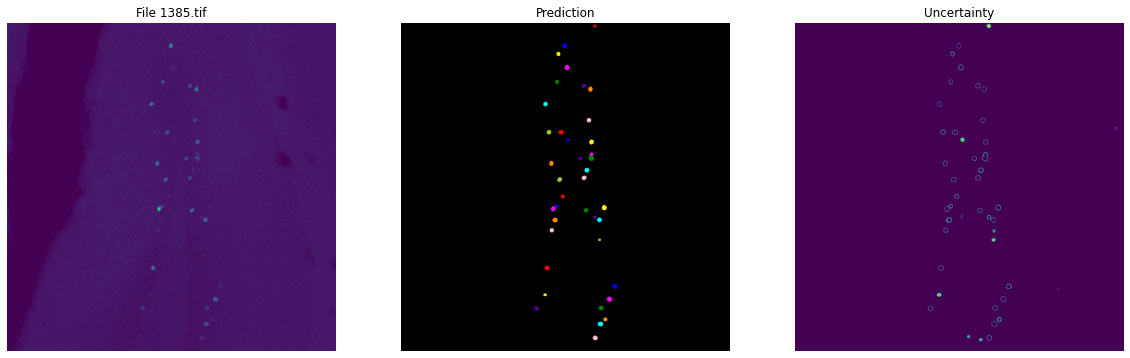

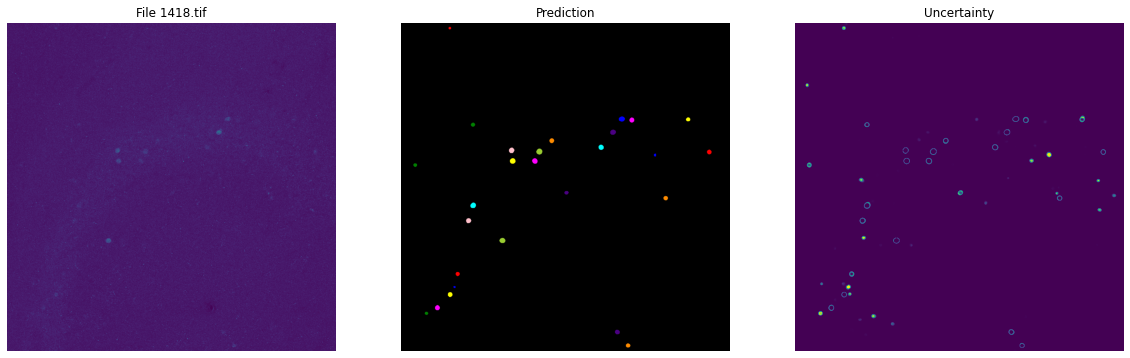

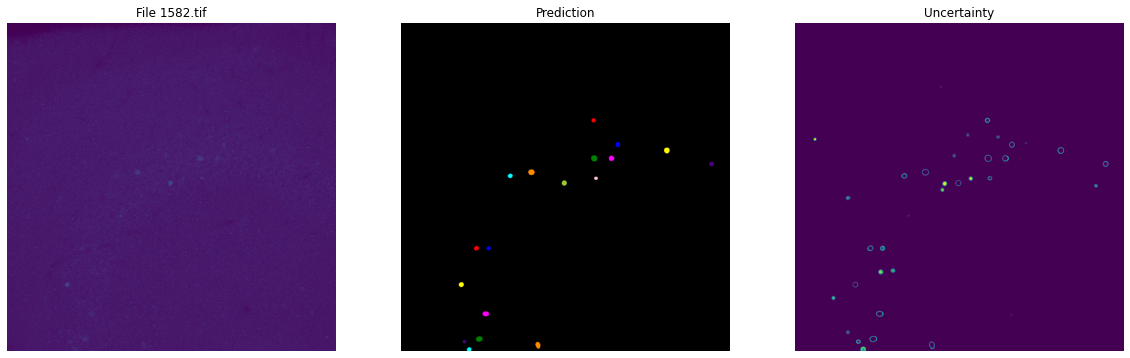

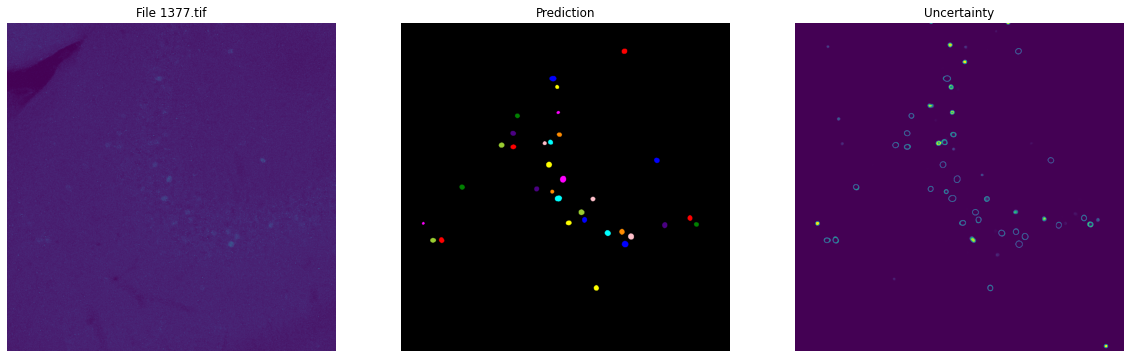

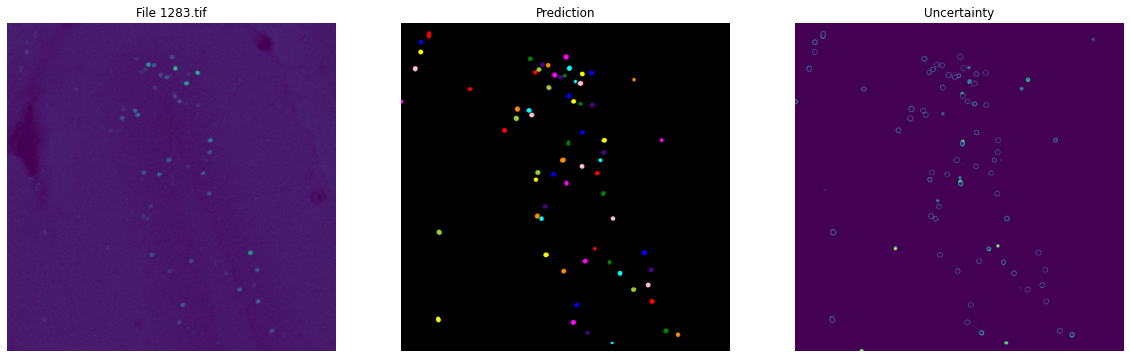

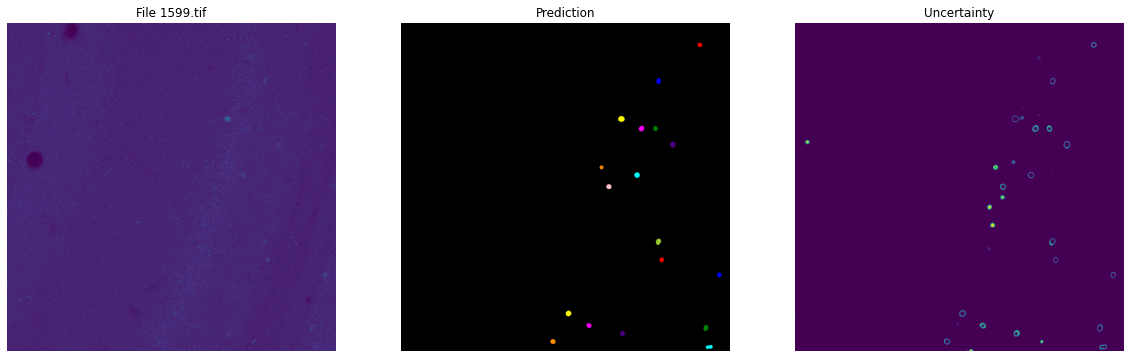

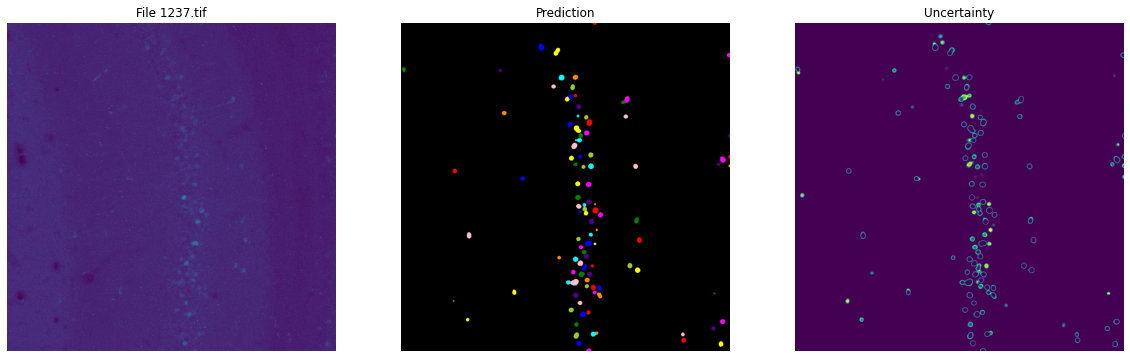

In [ ]:
# Predict and save instance segmentation masks
el_pred.get_cellpose_results(export_dir=prediction_path/'instance_masks')
el_pred.show_cellpose_results()